In [2]:
library(tidyverse)
library(chron)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
Sys.setlocale("LC_TIME","C")
options(stringsAsFactors=FALSE)
options(chron.year.abb=FALSE)
theme_set(theme_bw()) # just my preference for plots

[1] "C"

### Working directory

In [4]:
getwd()

[1] "/home/my_notebooks/Air_Pollution"

## Initialize needed functions

In [5]:
Month2Season <- function(month) {
 ## month is an integer (1-12)
 ## a factor with levels {"DJF", "MAM", "JJA", "SON"} is returned
 seasons <- c("DJF", "MAM", "JJA", "SON")
 index <- findInterval(month %% 12, seq(0, 12, 3))
 factor(seasons[index], seasons)
}

ReadTSeries <- function(filename, timecolumn="datetime", timeformat="%d.%m.%Y %H:%M") {
 ## read the table, strip units in column names, rename time column
 ## and change data type of time column from a string of characters to
 ## a numeric type so that we can perform operations on it
 data <- read.table(filename, skip=5, header=TRUE, sep=";", check.names=FALSE)
 names(data) <- sub("[ ].*$","",names(data)) # strip units for simplification
 names(data) <- sub("Date/time", timecolumn, names(data), fixed=TRUE)
 data[,timecolumn] <- as.chron(data[,timecolumn], timeformat) - 1/24 # end time -> start time
 ## extract additional variables from the time column
 data[,"year"] <- years(data[,timecolumn])
 data[,"month"] <- months(data[,timecolumn])
 data[,"day"] <- days(data[,timecolumn])
 data[,"hour"] <- hours(data[,timecolumn])
 data[,"dayofwk"] <- weekdays(data[,timecolumn])
 data[,"daytype"] <- ifelse(data[,"dayofwk"] %in% c("Sat","Sun"), "Weekend", "Weekday")
 data[,"season"] <- Month2Season(unclass(data[,"month"]))
 ## return value
 data
}


In [11]:
LAU_df <- ReadTSeries(file.path(datapath, "LAU.csv"))
MAG_df <- ReadTSeries(file.path(datapath, "MAG.csv"))

In [12]:
head(LAU_df)

,datetime,O3,NO2,CO,PM10,PM2.5,NOX,TEMP,PREC,RAD,year,month,day,hour,dayofwk,daytype,season
,<chron>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<ord>,<ord>,<dbl>,<ord>,<chr>,<fct>
1,(01/01/2022 00:00:00),7.9,36.5,0.3,19.5,9.6,65.6,7.4,0,-6.6,2022,Jan,1,0,Sat,Weekend,DJF
2,(01/01/2022 01:00:00),2.4,51.1,0.5,27.1,14.8,122.1,6.5,0,-7.2,2022,Jan,1,1,Sat,Weekend,DJF
3,(01/01/2022 02:00:00),17.7,29.3,0.3,15.3,7.7,48.6,7.3,0,-5.7,2022,Jan,1,2,Sat,Weekend,DJF
4,(01/01/2022 03:00:00),9.7,47.5,0.3,14.9,6.8,91.0,7.2,0,-5.8,2022,Jan,1,3,Sat,Weekend,DJF
5,(01/01/2022 04:00:00),17.0,33.3,0.3,11.7,5.6,58.9,7.4,0,-5.5,2022,Jan,1,4,Sat,Weekend,DJF
6,(01/01/2022 05:00:00),4.3,43.9,0.3,13.3,6.6,114.3,6.2,0,-7.2,2022,Jan,1,5,Sat,Weekend,DJF


In [13]:
head(MAG_df)

,datetime,O3,NO2,SO2,PM10,PM2.5,EC,NOX,TEMP,PREC,RAD,year,month,day,hour,dayofwk,daytype,season
,<chron>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<ord>,<ord>,<dbl>,<ord>,<chr>,<fct>
1,(01/01/2022 00:00:00),1.1,20.4,1.8,48.7,40.6,2.8,66.9,-0.5,0,0,2022,Jan,1,0,Sat,Weekend,DJF
2,(01/01/2022 01:00:00),0.9,19.2,1.8,45.6,38.3,2.7,64.9,-0.7,0,0,2022,Jan,1,1,Sat,Weekend,DJF
3,(01/01/2022 02:00:00),1.0,19.3,1.7,49.8,41.8,2.6,57.8,-0.6,0,0,2022,Jan,1,2,Sat,Weekend,DJF
4,(01/01/2022 03:00:00),0.7,16.7,1.5,43.8,36.4,2.3,48.9,-0.9,0,0,2022,Jan,1,3,Sat,Weekend,DJF
5,(01/01/2022 04:00:00),0.8,19.1,1.7,45.7,38.4,2.3,51.7,-0.7,0,0,2022,Jan,1,4,Sat,Weekend,DJF
6,(01/01/2022 05:00:00),0.5,18.4,1.6,39.2,33.2,2.0,42.2,-0.9,0,0,2022,Jan,1,5,Sat,Weekend,DJF


In [14]:
datapath <- file.path("data")
df <- full_join(cbind(site="LAU", ReadTSeries(file.path(datapath, "LAU.csv"))),
 cbind(site="MAG", ReadTSeries(file.path(datapath, "MAG.csv"))))

Joining, by = c("site", "datetime", "O3", "NO2", "PM10", "PM2.5", "NOX",
"TEMP", "PREC", "RAD", "year", "month", "day", "hour", "dayofwk", "daytype",
"season")


In [16]:
head(df)

,site,datetime,O3,NO2,CO,PM10,PM2.5,NOX,TEMP,PREC,RAD,year,month,day,hour,dayofwk,daytype,season,SO2,EC
,<chr>,<chron>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<ord>,<ord>,<dbl>,<ord>,<chr>,<fct>,<dbl>,<dbl>
1,LAU,(01/01/2022 00:00:00),7.9,36.5,0.3,19.5,9.6,65.6,7.4,0,-6.6,2022,Jan,1,0,Sat,Weekend,DJF,NA,NA
2,LAU,(01/01/2022 01:00:00),2.4,51.1,0.5,27.1,14.8,122.1,6.5,0,-7.2,2022,Jan,1,1,Sat,Weekend,DJF,NA,NA
3,LAU,(01/01/2022 02:00:00),17.7,29.3,0.3,15.3,7.7,48.6,7.3,0,-5.7,2022,Jan,1,2,Sat,Weekend,DJF,NA,NA
4,LAU,(01/01/2022 03:00:00),9.7,47.5,0.3,14.9,6.8,91.0,7.2,0,-5.8,2022,Jan,1,3,Sat,Weekend,DJF,NA,NA
5,LAU,(01/01/2022 04:00:00),17.0,33.3,0.3,11.7,5.6,58.9,7.4,0,-5.5,2022,Jan,1,4,Sat,Weekend,DJF,NA,NA
6,LAU,(01/01/2022 05:00:00),4.3,43.9,0.3,13.3,6.6,114.3,6.2,0,-7.2,2022,Jan,1,5,Sat,Weekend,DJF,NA,NA


In [17]:
tail(df)

,site,datetime,O3,NO2,CO,PM10,PM2.5,NOX,TEMP,PREC,RAD,year,month,day,hour,dayofwk,daytype,season,SO2,EC
,<chr>,<chron>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<ord>,<ord>,<dbl>,<ord>,<chr>,<fct>,<dbl>,<dbl>
17515,MAG,(12/31/2022 18:00:00),2.7,27.7,NA,15.2,13.3,34.5,7.9,0,0,2022,Dec,31,18,Sat,Weekend,DJF,1.2,1.2
17516,MAG,(12/31/2022 19:00:00),2.7,23.8,NA,17.5,16.0,31.0,7.7,0,0,2022,Dec,31,19,Sat,Weekend,DJF,1.1,1.3
17517,MAG,(12/31/2022 20:00:00),2.0,22.1,NA,18.0,16.0,27.9,7.4,0,0,2022,Dec,31,20,Sat,Weekend,DJF,1.0,1.2
17518,MAG,(12/31/2022 21:00:00),2.7,21.9,NA,22.8,20.7,38.8,7.5,0,0,2022,Dec,31,21,Sat,Weekend,DJF,1.1,1.8
17519,MAG,(12/31/2022 22:00:00),2.4,20.1,NA,25.3,23.0,39.3,7.2,0,0,2022,Dec,31,22,Sat,Weekend,DJF,1.1,1.7
17520,MAG,(12/31/2022 23:00:00),2.7,18.1,NA,35.5,34.0,43.9,7.1,0,0,2022,Dec,31,23,Sat,Weekend,DJF,1.2,2.1


In [18]:
saveRDS(df, "data/MAG-LAU.rds")

In [19]:
lf <- df %>%
 gather(variable, value,
 -c(site, datetime, season, year, month, day, hour, dayofwk, daytype))

In [21]:
head(lf)

,site,datetime,year,month,day,hour,dayofwk,daytype,season,variable,value
,<chr>,<chron>,<ord>,<ord>,<ord>,<dbl>,<ord>,<chr>,<fct>,<chr>,<dbl>
1,LAU,(01/01/2022 00:00:00),2022,Jan,1,0,Sat,Weekend,DJF,O3,7.9
2,LAU,(01/01/2022 01:00:00),2022,Jan,1,1,Sat,Weekend,DJF,O3,2.4
3,LAU,(01/01/2022 02:00:00),2022,Jan,1,2,Sat,Weekend,DJF,O3,17.7
4,LAU,(01/01/2022 03:00:00),2022,Jan,1,3,Sat,Weekend,DJF,O3,9.7
5,LAU,(01/01/2022 04:00:00),2022,Jan,1,4,Sat,Weekend,DJF,O3,17.0
6,LAU,(01/01/2022 05:00:00),2022,Jan,1,5,Sat,Weekend,DJF,O3,4.3


# View variability in pollutant concentrations

In [40]:
pollutants <- c("CO", "NO2", "NOX", "O3", "PM10", "PM2.5")

Warning message:
“Removed 8760 rows containing missing values (`geom_line()`).”


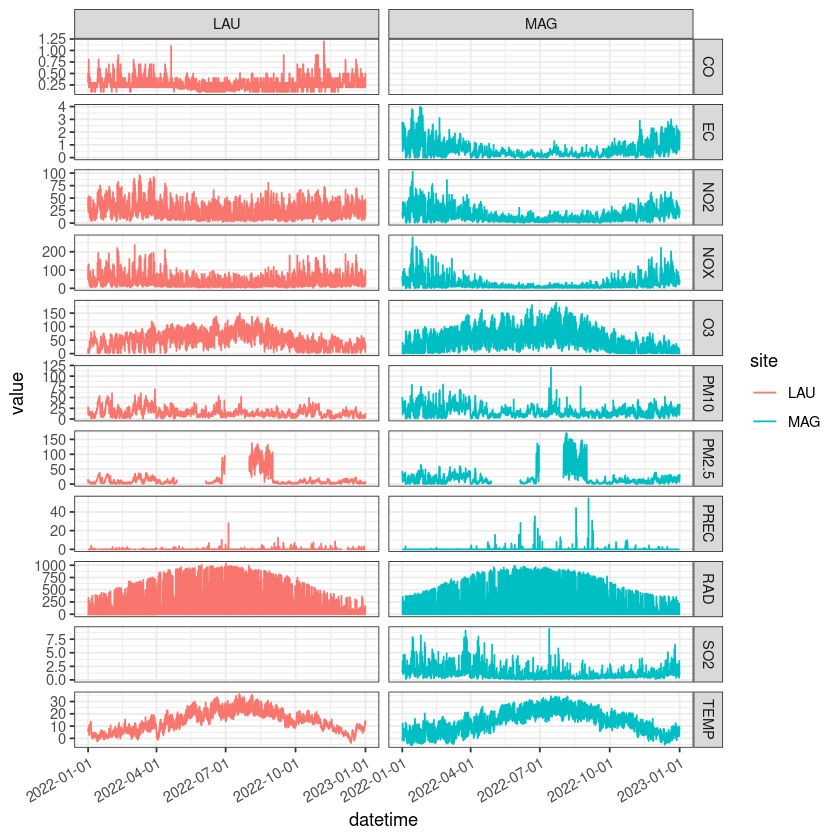

In [22]:
 ggplot(lf)+ # `lf` is the data frame
 facet_grid(variable~site, scale="free_y")+ # panels created out of these variables
 geom_line(aes(datetime, value, color=site))+ # plot `value` vs. `time` as lines
 scale_x_chron()+ # format x-axis labels (time units)
 theme(axis.text.x=element_text(angle=30, hjust=1)) # rotate x-axis labels

# Seasonal variations

Warning message:
“Removed 30053 rows containing non-finite values (`stat_boxplot()`).”


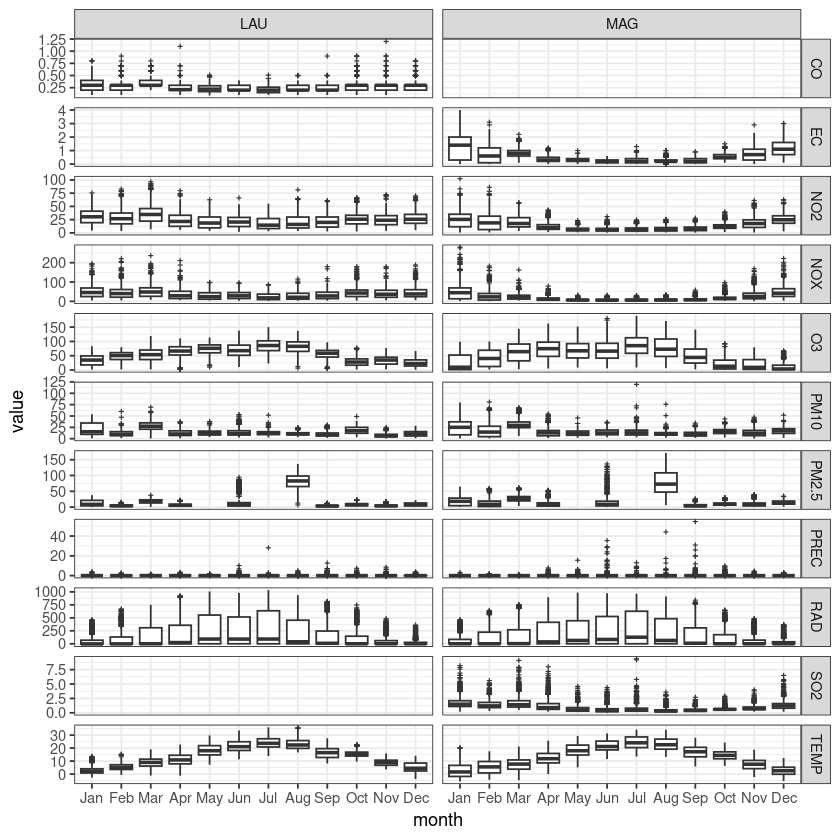

In [24]:
ggplot(lf) +
 facet_grid(variable ~ site, scale = "free_y") +
 geom_boxplot(aes(month, value), outlier.size = 0.5, outlier.shape = 3)

### By day type and season:

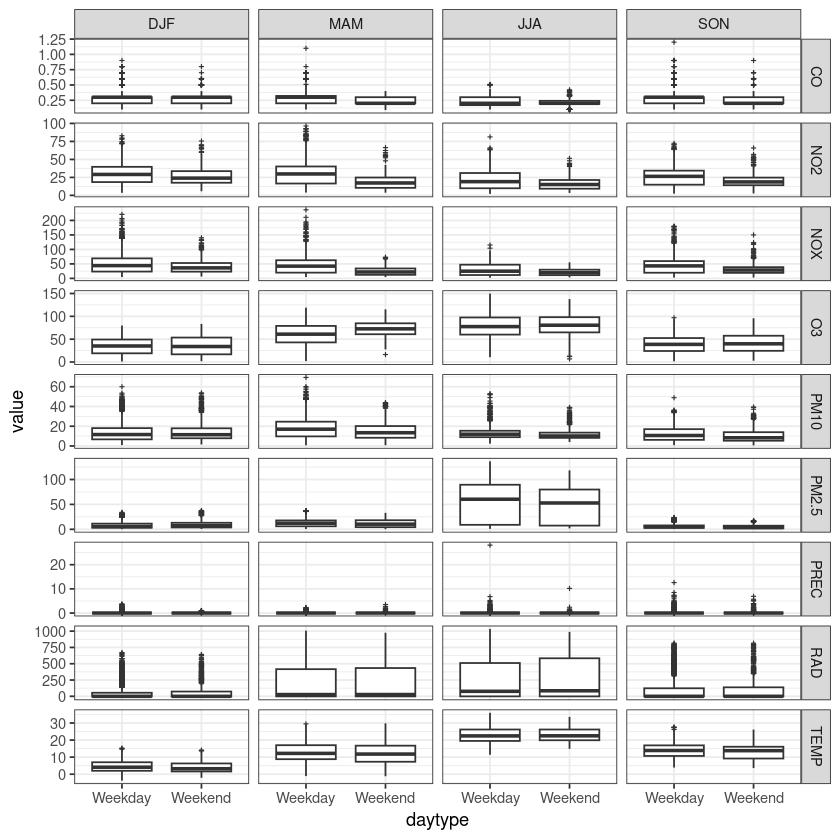

In [25]:
lf %>%
 filter(site=="LAU" & !is.na(value)) %>%
 ggplot +
 facet_grid(variable ~ season, scale = "free_y") +
 geom_boxplot(aes(daytype, value), outlier.size = 0.5, outlier.shape = 3)

### By season and station

Warning message:
“Removed 30053 rows containing non-finite values (`stat_boxplot()`).”


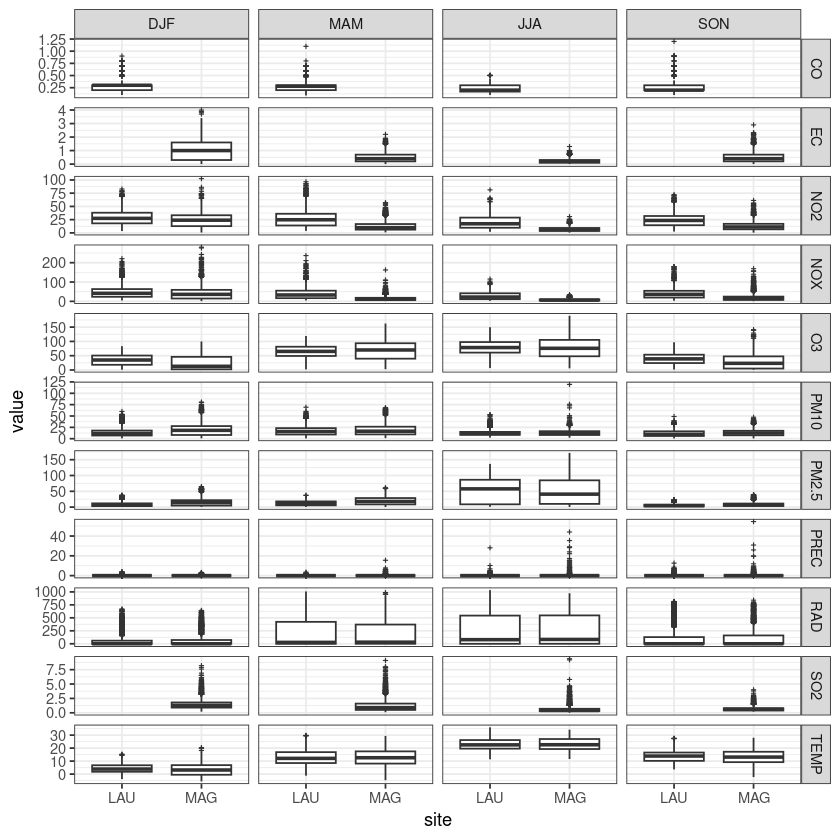

In [28]:
lf %>%
 ggplot +
 facet_grid(variable ~ season, scale = "free_y") +
 geom_boxplot(aes(site, value), outlier.size = 0.5, outlier.shape = 3)

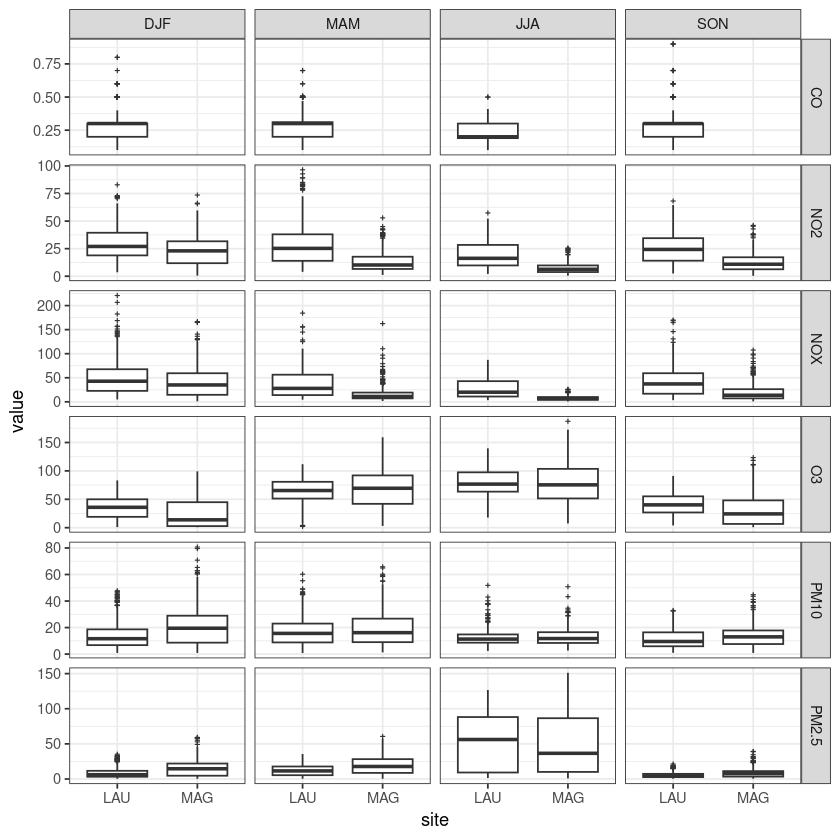

In [44]:
lf %>%
 filter(variable == pollutants & !is.na(value)) %>%
 ggplot +
 facet_grid(variable ~ season, scale = "free_y") +
 geom_boxplot(aes(site, value), outlier.size = 0.5, outlier.shape = 3)

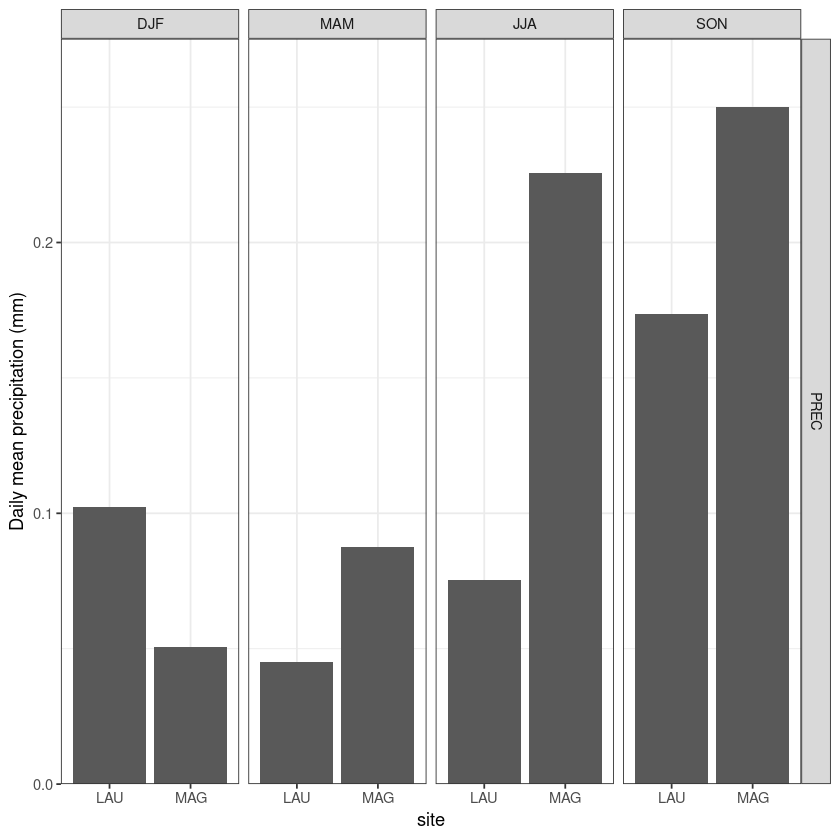

In [31]:
lf %>%
 filter(!is.na(value) & variable=="PREC") %>%
 ggplot +
 facet_grid(variable ~ season, scale = "free_y") +
 geom_bar(aes(site, value), stat="summary", fun="mean", show.legend = FALSE) +
 scale_y_continuous("Daily mean precipitation (mm)", expand=expansion(mult=c(0, 0.1)))

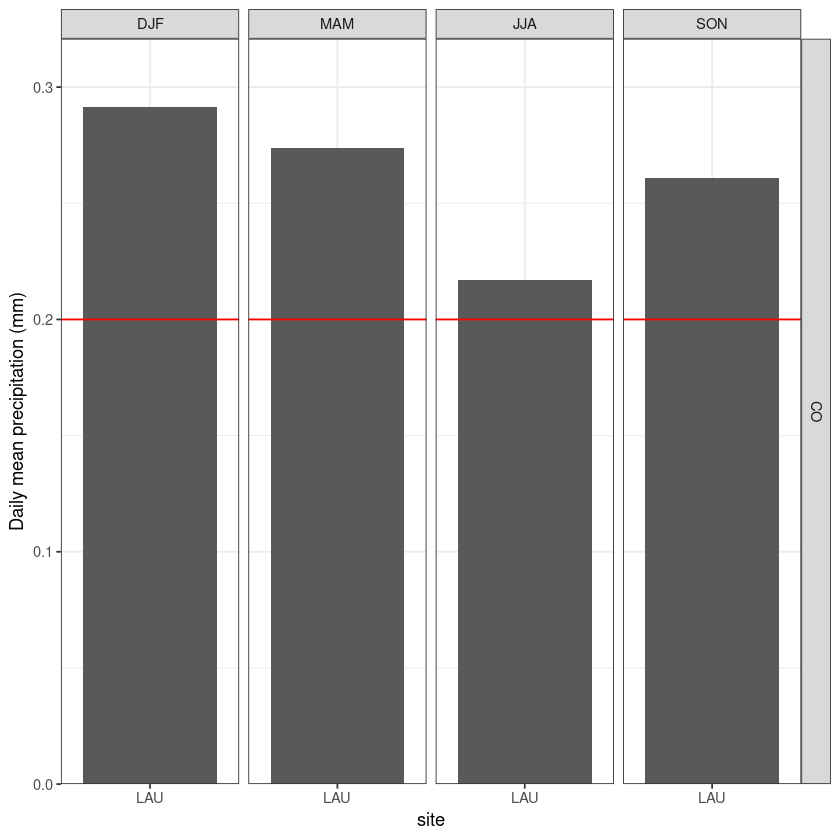

In [38]:
lf %>%
 filter(!is.na(value) & variable=="CO") %>%
 ggplot +
 facet_grid(variable ~ season, scale = "free_y") +
 geom_bar(aes(site, value), stat="summary", fun="mean", show.legend = FALSE) +
 scale_y_continuous("Daily mean precipitation (mm)", expand=expansion(mult=c(0, 0.1))) +
 geom_hline(yintercept=0.2, color="red")